In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 读取CSV文件
data_file = r"data/melanocortin_receptor_4_mmps_ori.csv"
save_file = r"data/melanocortin_receptor_4_mmps.csv"
df = pd.read_csv(data_file)

# 2. 重新计算delta值 (pKi_1 - pKi_2)
df['delta'] = df['pKi_1'] - df['pKi_2']

# 3. 打印基本统计信息
print("Delta值的基本统计信息：")
print(df['delta'].describe())
print("\nDelta值分布的详细信息：")
print(f"均值: {df['delta'].mean():.4f}")
print(f"中位数: {df['delta'].median():.4f}")
print(f"标准差: {df['delta'].std():.4f}")
print(f"数据点总数: {len(df)}")


# 5. 可选：保存更新后的数据到新文件
df.to_csv(save_file, index=False)


# 7. 检查缺失值和异常值
print("\n数据质量检查：")
print(f"缺失值数量: {df['delta'].isnull().sum()}")
print(f"无穷值数量: {np.isinf(df['delta']).sum()}")
print(f"Delta值范围: [{df['delta'].min():.4f}, {df['delta'].max():.4f}]")

Delta值的基本统计信息：
count    5861.000000
mean        0.006896
std         0.582995
min        -3.623249
25%        -0.352183
50%         0.000000
75%         0.363231
max         3.367977
Name: delta, dtype: float64

Delta值分布的详细信息：
均值: 0.0069
中位数: 0.0000
标准差: 0.5830
数据点总数: 5861

数据质量检查：
缺失值数量: 0
无穷值数量: 0
Delta值范围: [-3.6232, 3.3680]


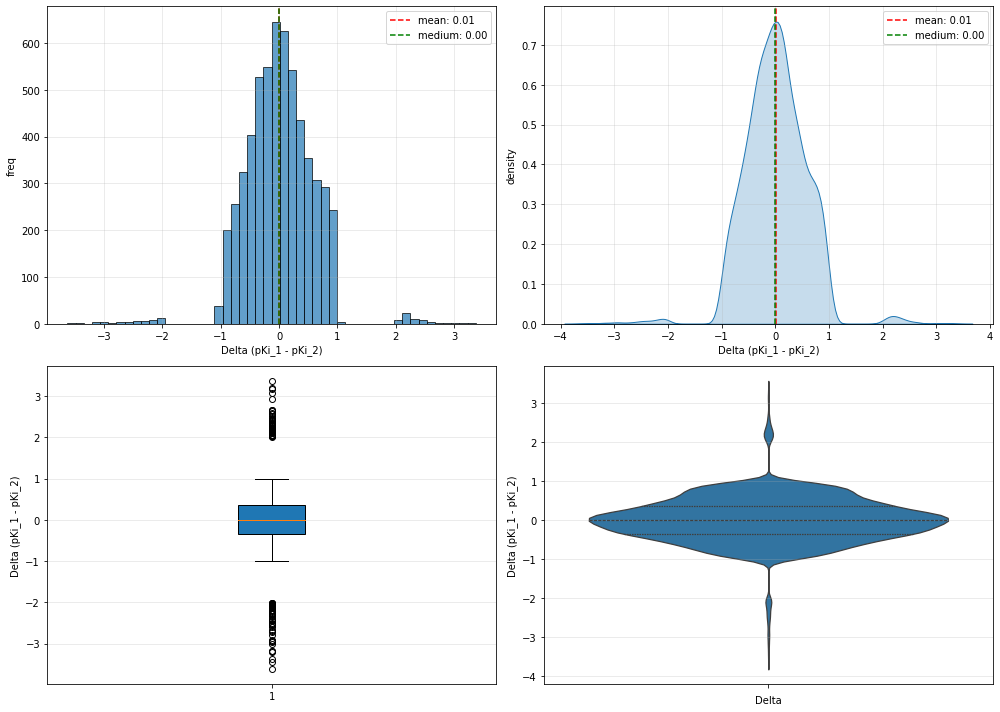

In [9]:
# 4. 创建统计分析图表
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 图1: 直方图
axes[0, 0].hist(df['delta'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['delta'].mean(), color='red', linestyle='--', label=f'mean: {df["delta"].mean():.2f}')
axes[0, 0].axvline(df['delta'].median(), color='green', linestyle='--', label=f'medium: {df["delta"].median():.2f}')
axes[0, 0].set_xlabel('Delta (pKi_1 - pKi_2)')
axes[0, 0].set_ylabel('freq')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 图2: 核密度估计图
sns.kdeplot(data=df['delta'], ax=axes[0, 1], fill=True)
axes[0, 1].axvline(df['delta'].mean(), color='red', linestyle='--', label=f'mean: {df["delta"].mean():.2f}')
axes[0, 1].axvline(df['delta'].median(), color='green', linestyle='--', label=f'medium: {df["delta"].median():.2f}')
axes[0, 1].set_xlabel('Delta (pKi_1 - pKi_2)')
axes[0, 1].set_ylabel('density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 图3: 箱线图
axes[1, 0].boxplot(df['delta'], patch_artist=True)
axes[1, 0].set_ylabel('Delta (pKi_1 - pKi_2)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 图4: 小提琴图
sns.violinplot(data=df['delta'], ax=axes[1, 1], inner='quartile')
axes[1, 1].set_xlabel('Delta')
axes[1, 1].set_ylabel('Delta (pKi_1 - pKi_2)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('delta_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()